<a href="https://colab.research.google.com/github/akash-elangovan/Comparative-Study-for-Prediction-of-Mechanical-Properties-using-Low-Alloy-Steels/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout

# **Data Preprocessing**

In [4]:
# reading the dataset file
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT/NIMS Low Alloy Steels Dataset.csv')
columns = list(data.columns)
data.head().T

,0,1,2,3,4
Alloy code,MBB,MBB,MBB,MBB,MBB
C,0.12,0.12,0.12,0.12,0.12
Si,0.36,0.36,0.36,0.36,0.36
Mn,0.52,0.52,0.52,0.52,0.52
P,0.009,0.009,0.009,0.009,0.009
S,0.003,0.003,0.003,0.003,0.003
Ni,0.089,0.089,0.089,0.089,0.089
Cr,0.97,0.97,0.97,0.97,0.97
Mo,0.61,0.61,0.61,0.61,0.61
Cu,0.04,0.04,0.04,0.04,0.04


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

In [6]:
data.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


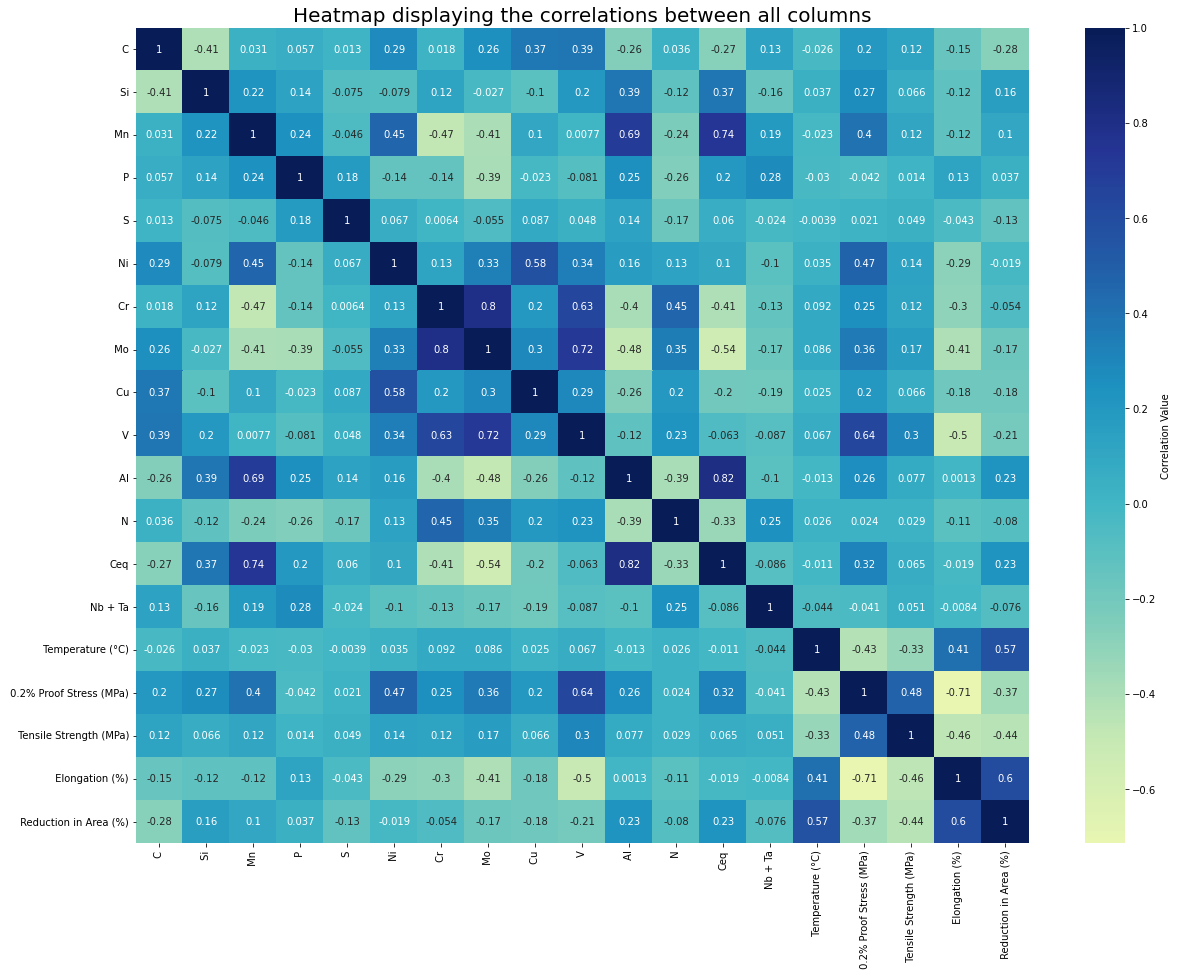

In [7]:
corr = data.corr()

plt.figure(figsize=(20,15))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

## **From above diagram following conclusions can be made:**
1. Temperature has significant influence on % Elongation and % Reduction in area.
2. 0.2% Proof Strength is highly influenced by presence of V, Ni, Mn, Mo, Ceq, Si, Al, Cr, C and Cu in decreasing order.
3. Tensile Strength is highly influenced by presence of V and moderately influenced by presence of Mo, Ni, Cr, C and Mn in decreasing order.
4. Tensile Strength is also highly related to 0.2% Proof Strength.
5. % Elongation and % Reduction in Area show maximum correlation with each other followed by temperature.
6. % Elongation is moderately influenced by presence of P and slightly influenced by presence of Al
7. % Reduction in Area is moderately influenced by presence of Al, Ceq, Si and Mn.

In [8]:
# x includes all the input features including the composition of the alloy and temperature
# y includes the mechanical properties of the alloy which are to be predicted by the model
x = data.iloc[:, 1:16].values
y = data.iloc[:, 16:].values

# Making the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

In [9]:
# Scaling down the inputs and outputs
# Scaling method used here is : scaled_value = (x - mean)/(std_dev) 

sc_x = StandardScaler()
sc_x.fit(x_train)
x_train_sc = sc_x.transform(x_train)
x_test_sc = sc_x.transform(x_test)

sc_y = StandardScaler()
sc_y.fit(y_train)
y_train_sc = sc_y.transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [10]:
print(min(y_train_sc[:,0]))

-2.2819541817681674


In [11]:
# To be used later while visualizing results
actual_proof_strength = np.transpose(y_test)[0]
actual_tensile_strength = np.transpose(y_test)[1]
actual_pct_elongation = np.transpose(y_test)[2]
actual_pct_reduction_area = np.transpose(y_test)[3]

# **Regression using Neural Network**


In [12]:
# Building the Neural Network
model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 45, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 40, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [13]:
# Training the model and predicting the results
history = model.fit(x_train_sc, y_train_sc, batch_size = 256, shuffle=True, epochs = 10000)
y_nn_pred_sc = model.predict(x_test_sc)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 6ms/step - loss: 0.3065 - mean_squared_error: 0.3065
Epoch 7502/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.3067 - mean_squared_error: 0.3067
Epoch 7503/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.3064 - mean_squared_error: 0.3064
Epoch 7504/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.3063 - mean_squared_error: 0.3063
Epoch 7505/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.3062 - mean_squared_error: 0.3062
Epoch 7506/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.3061 - mean_squared_error: 0.3061
Epoch 7507/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.3061 - mean_squared_error: 0.3061
Epoch 7508/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.3064 - mean_squared_error: 0.3064
Epoch 7509/10000
3/3 [==============================] - 0s 8ms/step - 

In [14]:
# Determining the model's accuracy
r2_nn = r2_score(y_test_sc, y_nn_pred_sc)
mse_nn = mean_squared_error(y_test_sc, y_nn_pred_sc)
mae_nn = mean_absolute_error(y_test_sc, y_nn_pred_sc)
print('R\u00b2_score = ' + str(round(r2_nn, 2)) + '              Higher is better')
print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae_nn, 2)) + '   Lower is better')

R²_score = 0.84              Higher is better
mean_squared_error = 0.13    Lower is better
mean_absolute_error = 0.22   Lower is better


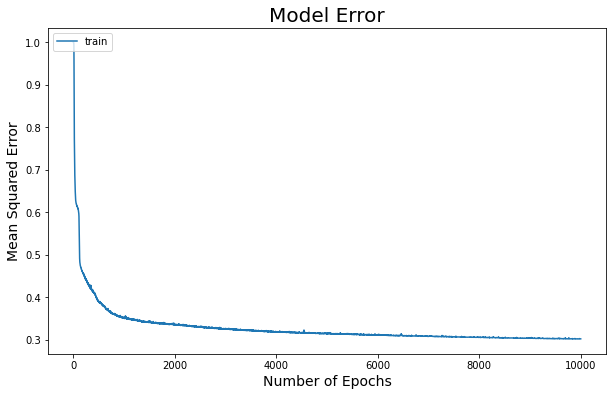

In [15]:
# Visualizing the model's learning history
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model Error', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Number of Epochs', fontsize=14)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Scaling up the outputs back to original
y_nn_pred = sc_y.inverse_transform(y_nn_pred_sc)

# Visualizing the accuracy of predicted values
nn_predicted_proof_strength = np.transpose(y_nn_pred)[0]
nn_predicted_tensile_strength = np.transpose(y_nn_pred)[1]
nn_predicted_pct_elongation = np.transpose(y_nn_pred)[2]
nn_predicted_pct_reduction_area = np.transpose(y_nn_pred)[3]

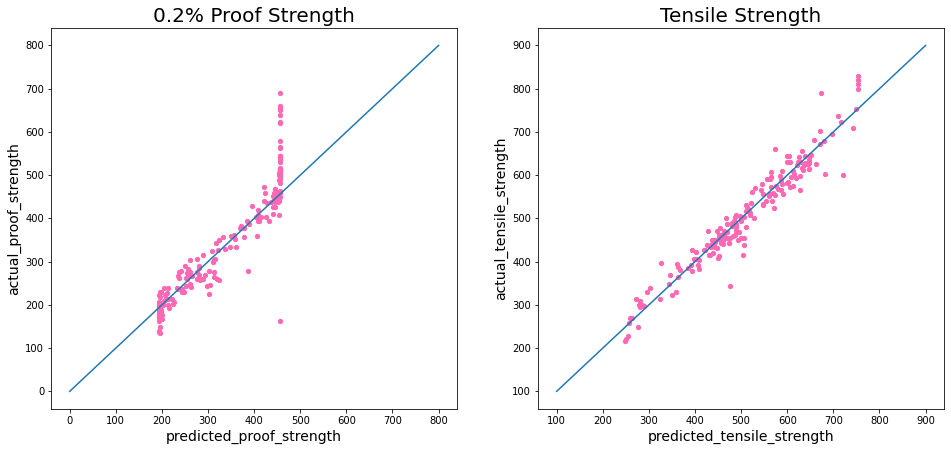

In [17]:
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,7))

ax0.scatter(nn_predicted_proof_strength, actual_proof_strength, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_proof_strength', fontsize = 14)
ax0.set_ylabel('actual_proof_strength', fontsize = 14)

ax1.scatter(nn_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

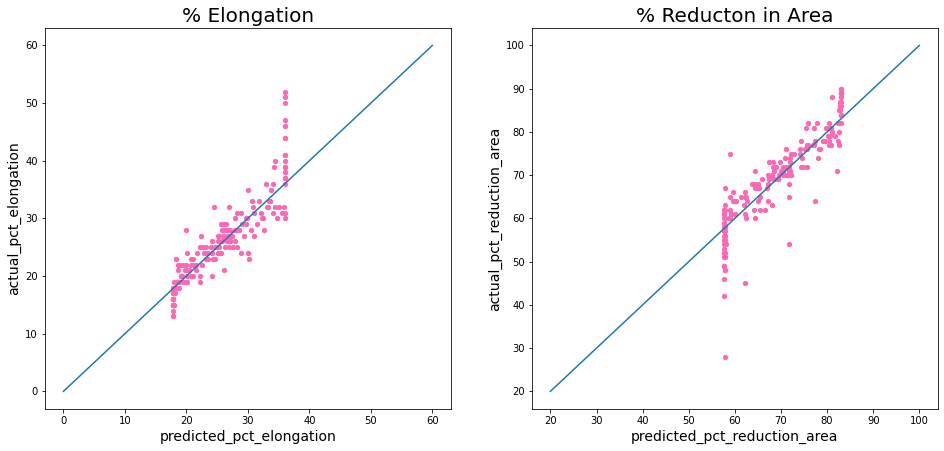

In [18]:
# Plotting graphs for % Elongation and % Reduction in Area
fig, (ax2,ax3) = plt.subplots(1,2,figsize=(16,7))

ax2.scatter(nn_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)

ax3.scatter(nn_predicted_pct_reduction_area, actual_pct_reduction_area, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax3.plot(x4, y4)
ax3.set_title('% Reducton in Area', fontsize = 20)
ax3.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax3.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()

In [19]:
# r2_score for each mechanical property
r2_proof_strength_nn = r2_score(actual_proof_strength, nn_predicted_proof_strength)
r2_tensile_strength_nn = r2_score(actual_tensile_strength, nn_predicted_tensile_strength)
r2_pct_elongation_nn = r2_score(actual_pct_elongation, nn_predicted_pct_elongation)
r2_pct_reduction_area_nn = r2_score(actual_pct_reduction_area, nn_predicted_pct_reduction_area)
print('R\u00b2_score for 0.2% Proof Strength = ' + str(round(r2_proof_strength_nn, 2)))
print('R\u00b2_score for Tensile strength    = ' + str(round(r2_tensile_strength_nn, 2)))
print('R\u00b2_score for % Elongation        = ' + str(round(r2_pct_elongation_nn, 2)))
print('R\u00b2_score for % Reduction in Area = ' + str(round(r2_pct_reduction_area_nn, 2)))

R²_score for 0.2% Proof Strength = 0.83
R²_score for Tensile strength    = 0.94
R²_score for % Elongation        = 0.8
R²_score for % Reduction in Area = 0.8


# **Random Forest Regression**

In [20]:
# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, criterion='mse')
regressor.fit(x_train_sc, y_train_sc)
y_rf_pred_sc = regressor.predict(x_test_sc)

# Calculating accuracy metrics
r2_rf = r2_score(y_test_sc, y_rf_pred_sc)
mse_rf = mean_squared_error(y_test_sc, y_rf_pred_sc)
mae_rf = mean_absolute_error(y_test_sc, y_rf_pred_sc)

# Printing the results
print('R\u00b2_score = ' + str(round(r2_rf, 2)) + '              Higher is better')
print('mean_squared_error = ' + str(round(mse_rf, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae_rf, 2)) + '   Lower is better')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


R²_score = 0.91              Higher is better
mean_squared_error = 0.07    Lower is better
mean_absolute_error = 0.16   Lower is better


In [21]:
# Scaling up the inputs
y_rf_pred = sc_y.inverse_transform(y_rf_pred_sc)

# Visualizing the accuracy of predicted results
rf_predicted_proof_strength = np.transpose(y_rf_pred)[0]
rf_predicted_tensile_strength = np.transpose(y_rf_pred)[1]
rf_predicted_pct_elongation = np.transpose(y_rf_pred)[2]
rf_predicted_pct_reduction_area = np.transpose(y_rf_pred)[3]

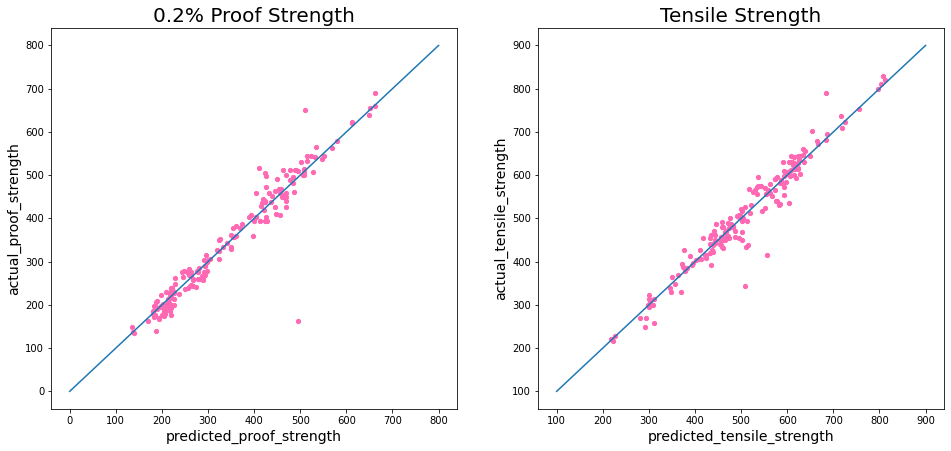

In [22]:
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax4,ax5) = plt.subplots(1,2,figsize=(16,7))

ax4.scatter(rf_predicted_proof_strength, actual_proof_strength, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax4.plot(x3, y3)
ax4.set_title('0.2% Proof Strength', fontsize = 20)
ax4.set_xlabel('predicted_proof_strength', fontsize = 14)
ax4.set_ylabel('actual_proof_strength', fontsize = 14)

ax5.scatter(rf_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax5.plot(x4, y4)
ax5.set_title('Tensile Strength', fontsize = 20)
ax5.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax5.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

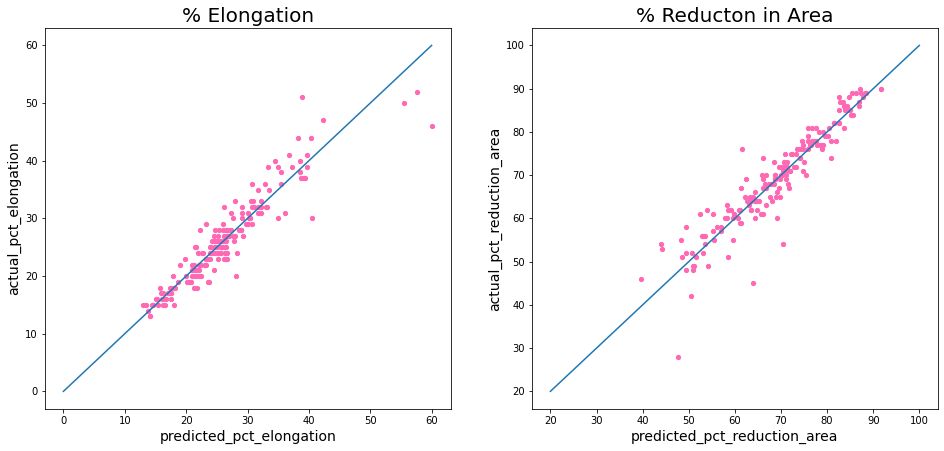

In [23]:
# Plotting graphs for % Elongation and % Reduction in Area
fig, (ax6,ax7) = plt.subplots(1,2,figsize=(16,7))

ax6.scatter(rf_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax6.plot(x3, y3)
ax6.set_title('% Elongation', fontsize = 20)
ax6.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax6.set_ylabel('actual_pct_elongation', fontsize = 14)

ax7.scatter(rf_predicted_pct_reduction_area, actual_pct_reduction_area, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax7.plot(x4, y4)
ax7.set_title('% Reducton in Area', fontsize = 20)
ax7.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax7.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()

In [24]:
# r2_score for each mechanical property
r2_proof_strength_rf = r2_score(actual_proof_strength, rf_predicted_proof_strength)
r2_tensile_strength_rf = r2_score(actual_tensile_strength, rf_predicted_tensile_strength)
r2_pct_elongation_rf = r2_score(actual_pct_elongation, rf_predicted_pct_elongation)
r2_pct_reduction_area_rf = r2_score(actual_pct_reduction_area, rf_predicted_pct_reduction_area)
print('R\u00b2_score for 0.2% Proof Strength = ' + str(round(r2_proof_strength_rf, 2)))
print('R\u00b2_score for Tensile strength    = ' + str(round(r2_tensile_strength_rf, 2)))
print('R\u00b2_score for % Elongation        = ' + str(round(r2_pct_elongation_rf, 2)))
print('R\u00b2_score for % Reduction in Area = ' + str(round(r2_pct_reduction_area_rf, 2)))

R²_score for 0.2% Proof Strength = 0.93
R²_score for Tensile strength    = 0.95
R²_score for % Elongation        = 0.87
R²_score for % Reduction in Area = 0.87


# **Comparing both the models**

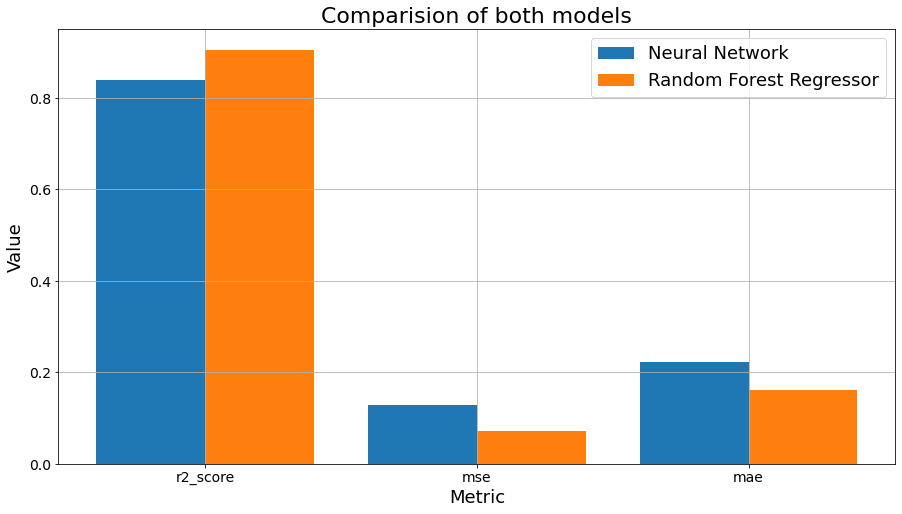

In [25]:
fig= plt.figure(figsize=(15,8))
X = ['r2_score', 'mse', 'mae']
nn = [r2_nn, mse_nn, mae_nn]
rf = [r2_rf, mse_rf, mae_rf]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, nn, 0.4, label = 'Neural Network')
plt.bar(X_axis + 0.2, rf, 0.4, label = 'Random Forest Regressor')
  
plt.xticks(X_axis, X, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Metric", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Comparision of both models", fontsize=22)
plt.legend(fontsize = 18)
plt.grid()
plt.show()


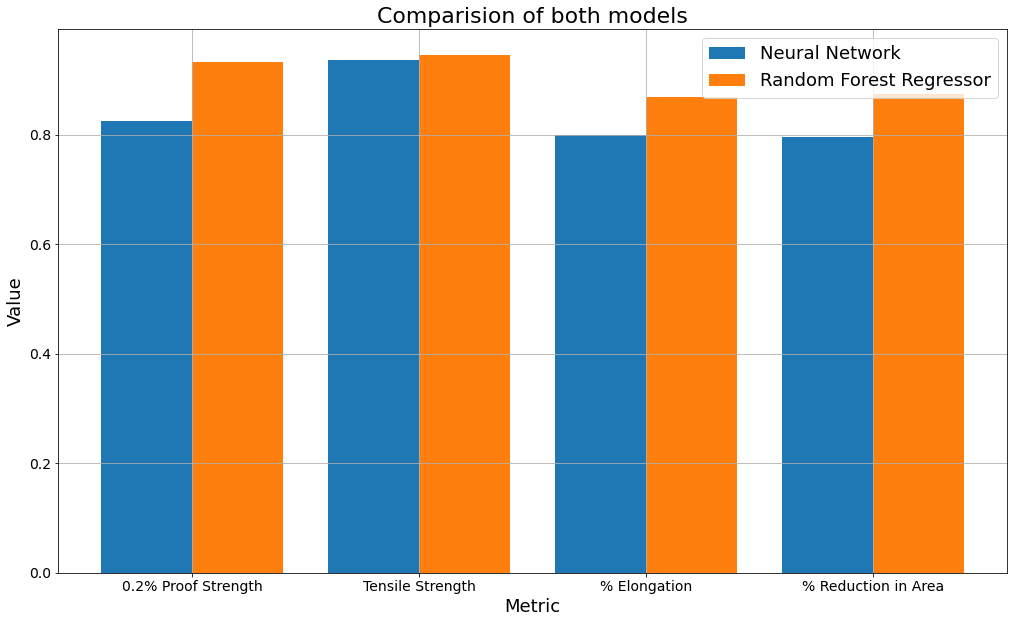

In [26]:
fig= plt.figure(figsize=(17,10))
X = ['0.2% Proof Strength', 'Tensile Strength', '% Elongation', '% Reduction in Area']
nn = [r2_proof_strength_nn, r2_tensile_strength_nn, r2_pct_elongation_nn, r2_pct_reduction_area_nn]
rf = [r2_proof_strength_rf, r2_tensile_strength_rf, r2_pct_elongation_rf, r2_pct_reduction_area_rf]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, nn, 0.4, label = 'Neural Network')
plt.bar(X_axis + 0.2, rf, 0.4, label = 'Random Forest Regressor')
  
plt.xticks(X_axis, X, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Metric", fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.title("Comparision of both models", fontsize=22)
plt.legend(fontsize = 18)
plt.grid()
plt.show()

# **Conclusion**

The random forest regressor performs better in each category and overall as compared to neural networks. Being computationally cheap to train, manually easier to fine-tune and highly versatile to fit itself on a complex data containing regressions within clusters, this model makes for an ideal choice for prediction of mechanical properties of low-alloy steels with R² score of 0.91, which is significantly greater than R² score of Neural Network which is 0.84